<a href="https://colab.research.google.com/github/BeMindYou/Lesson/blob/main/Assessment_Tools/%D0%A0%D0%B0%D1%81%D1%87%D0%B5%D1%82_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D1%81%D0%B5%D1%80%D0%B8%D0%B8_%D1%83%D0%B1%D1%8B%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D1%85_%D1%81%D0%B4%D0%B5%D0%BB%D0%BE%D0%BA_%D0%B2_%D1%81%D0%B5%D1%80%D0%B8%D0%B8_%D0%B8%D0%B3%D1%80_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Чтобы рассчитать вероятность  P(n) того, что произойдет  n  проигрышей подряд в серии из  N  игр при заданной вероятности проигрыша  p , можно использовать следующие шаги:

1.  **Вероятность одного проигрыша:**  p = 1 - 0.475 = 0.525
2.  **Вероятность  n  проигрышей подряд:** Вероятность  n  подряд идущих проигрышей равна  p^n.
3. **Количество возможных позиций для  n  проигрышей подряд** в  N  играх: В серии из  N  игр есть  N - n + 1  возможных начальных позиций для  n  подряд идущих проигрышей.
4. **Вероятность отсутствия  n  проигрышей подряд:** Для расчета этой вероятности будем использовать обратный подход - сначала рассчитаем вероятность того, что в серии игр  n  подряд идущих проигрышей не произойдет, а затем вычтем это значение из единицы.

            5 проигрышей подряд  10 проигрышей подряд  15 проигрышей подряд
1000 игр                    1.0              0.793542              0.060641
1004 игр                    1.0              0.794852              0.060879
1009 игр                    1.0              0.796479              0.061177
1013 игр                    1.0              0.797770              0.061416
1018 игр                    1.0              0.799374              0.061713
...                         ...                   ...                   ...
98172 игр                   1.0              1.000000              0.998026
98626 игр                   1.0              1.000000              0.998082
99082 игр                   1.0              1.000000              0.998137
99540 игр                   1.0              1.000000              0.998190
100000 игр                  1.0              1.000000              0.998242

[1000 rows x 3 columns]


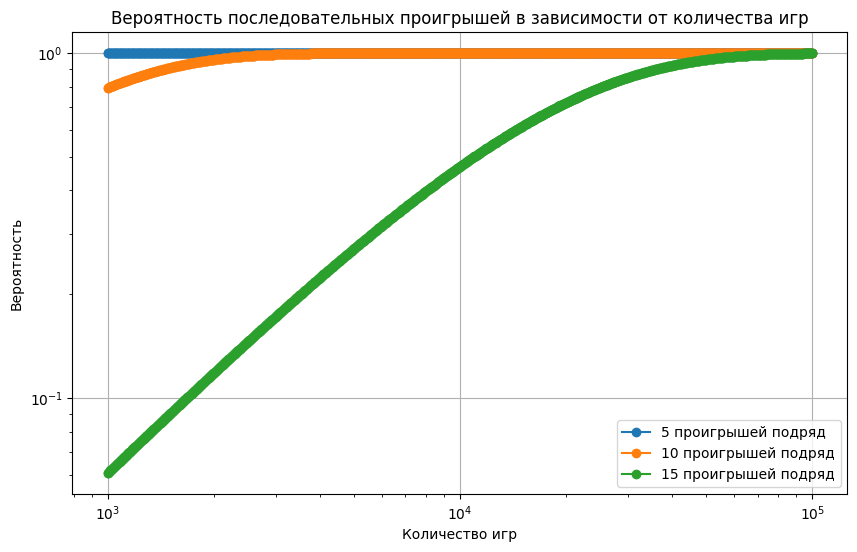

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Функция для расчета вероятности n последовательных проигрышей в N играх
def probability_consecutive_losses(n, N, p):
    # Вероятность n последовательных проигрышей
    prob_consecutive_losses = p ** n
    # Количество возможных позиций для n последовательных проигрышей в N играх
    positions = N - n + 1
    # Общая вероятность того, что хотя бы одна последовательность из n проигрышей произойдет
    total_prob = 1 - (1 - prob_consecutive_losses) ** positions
    return total_prob

# Заданные вероятности и количество игр
p_loss = 0.525

# Диапазон значений для n и N
n_min = 5
n_max = 15
n_step = 5

N_min = 1000
N_max = 100000
N_step = 1000

# Генерация значений n и N
n_values = list(range(n_min, n_max + 1, n_step))
N_values = list(np.logspace(np.log10(N_min), np.log10(N_max), num=N_step, dtype=int))

# Создаем таблицу для хранения результатов
results = np.zeros((len(N_values), len(n_values)))

# Рассчитываем вероятности
for i, N in enumerate(N_values):
    for j, n in enumerate(n_values):
        results[i, j] = probability_consecutive_losses(n, N, p_loss)

# Преобразуем результаты в DataFrame для удобного отображения
df_results = pd.DataFrame(results, columns=[f'{n} проигрышей подряд' for n in n_values], index=[f'{N} игр' for N in N_values])

# Вывод таблицы результатов
print(df_results)

# Построение графика
plt.figure(figsize=(10, 6))
for j, n in enumerate(n_values):
    plt.plot(N_values, results[:, j], label=f'{n} проигрышей подряд', marker='o')

plt.title('Вероятность последовательных проигрышей в зависимости от количества игр')
plt.xlabel('Количество игр')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()
